In [1]:
import pickle
import matplotlib.pyplot as plt

# Load the dictionary from the file
path_to_read = '/Users/luisescobar/Documents/Thesis/DataSets/Dictionary'
file = 'completo1007_(edit).pkl'
name_to_read = f'{path_to_read}/{file}'

with open(name_to_read, 'rb') as file:
    loaded_dict = pickle.load(file)


In [2]:
loaded_dict.keys()

dict_keys(['df_801', 'df_802', 'df_803', 'df_806', 'df_807', 'df_808', 'df_809', 'df_810', 'df_811', 'df_812', 'df_813', 'df_814', 'df_815', 'df_816', 'df_817', 'df_818', 'df_819', 'df_820', 'df_821', 'df_822', 'df_823', 'df_824', 'df_825', 'df_826', 'df_827', 'df_828', 'df_829', 'df_830', 'df_831', 'df_832', 'df_833', 'df_834', 'df_835', 'df_836', 'df_839', 'df_840', 'df_841', 'df_842', 'df_843', 'df_844', 'df_845', 'df_846', 'df_849', 'df_850', 'df_851', 'df_853', 'df_854', 'df_855', 'df_856', 'df_857', 'df_858', 'df_859', 'df_860', 'df_861', 'df_862', 'df_863', 'df_868', 'df_869', 'df_870', 'df_871', 'df_872', 'df_873', 'df_874', 'df_875', 'df_876', 'df_877', 'df_878', 'df_879', 'df_880', 'df_881', 'df_882', 'df_883', 'df_884', 'df_885', 'df_886', 'df_887', 'df_888', 'df_889', 'df_891', 'df_892', 'df_893', 'df_894', 'df_895', 'df_896', 'df_897', 'df_898', 'df_899', 'df_900', 'df_901', 'df_902', 'df_903', 'df_904', 'df_905', 'df_906', 'df_907', 'df_908', 'df_909', 'df_910', 'df_914',

<div class="alert alert-block alert-warning">
  <p>
    <b>To Do</b>
  </p>

  <p>
    When using a time window instead of single steps, it could be a problem to handle two different types of filters, 
    since the reference values might be different. Consider this when running the code and base on the result we will
    implement a solution 
  </p>
    
  <p>
  </p>
</div>

In [3]:
def condition_1(dframe_row,reference):
    row_deltaP = dframe_row['DeltaP']
    return row_deltaP > reference + 100

In [4]:
def handle_case(case):
    cases = {
        'septeX':  450,
        'ST150':   450,
        'oXiris':  450,
        'TPE2000': 500,
        'X-MARS':  600,
        'M100':    450,
        'ST60':    450,
        'HF1000':  500,
        'ST100':   450,
        'HF1400':  500
    }
    return cases.get(case, "Case not found")



def condition_2(dframe_row):
    '''The output is a row or chunk of rows from the whole DataFrame'''
    row_set = dframe_row['Set']
    P_Filter = dframe_row['P_Filter']
    TMP = dframe_row['TMP']
    tmp_filter = handle_case(row_set)
    return (P_Filter >= 450) and (TMP>tmp_filter)



<div class="alert alert-block alert-warning">
  <p>
    <b>To Do</b>
  </p>

  <p>
    We need to validate that the timeseries is in order and that we don't have replicate velues, specially in merged DataFrames 
  </p>
    
  <p>
  </p>
</div>

<div class="alert alert-block alert-warning">
  <p>
    <b>To Do</b>
  </p>

  <p>
    We need to solve the issue of computing a new reference value when clotting phenomenon is detected.
  </p> 
  <p>
    We can use a for loop in order to achieve this
  </p>
  <p>
      For the reference value at the end we can plot a new line in the axis
  </p>
</div>

In [5]:
'''
I want to create a function to run all the keys of the dictionary and identify for which treatments I have clotting phenomenon.
As output I want to have something like this

    trt     Clotting
'df_801', True/False
'df_802', True/False
'df_803', True/False

I want to improve this function since is slow with the computations
'''

clotting_list = []
for name in loaded_dict.keys():
    df_test = loaded_dict[name]
    reference = df_test['DeltaP'].iloc[0:9].median()
    df_test['Condition_1'] = df_test.apply(lambda row: condition_1(row, reference), axis=1)
    df_test['Condition_2'] = df_test.apply(condition_2, axis=1)
    df_test['Clotting'] = df_test['Condition_1'] | df_test['Condition_2']
    if True in df_test['Clotting'].unique():
        clotting_list.append([name,'Clotting'])
    else:
        #clotting_list.append([name, 'No Clotting'])
        continue
    

In [6]:
#We need to optimize the list generation, in general is slow

In [7]:
clotting_list

[['df_802', 'Clotting'],
 ['df_810', 'Clotting'],
 ['df_814', 'Clotting'],
 ['df_819', 'Clotting'],
 ['df_825', 'Clotting'],
 ['df_831', 'Clotting'],
 ['df_841', 'Clotting'],
 ['df_856', 'Clotting'],
 ['df_858', 'Clotting'],
 ['df_859', 'Clotting'],
 ['df_862', 'Clotting'],
 ['df_870', 'Clotting'],
 ['df_873', 'Clotting'],
 ['df_877', 'Clotting'],
 ['df_881', 'Clotting'],
 ['df_885', 'Clotting'],
 ['df_886', 'Clotting'],
 ['df_889', 'Clotting'],
 ['df_892', 'Clotting'],
 ['df_893', 'Clotting'],
 ['df_897', 'Clotting'],
 ['df_898', 'Clotting'],
 ['df_900', 'Clotting'],
 ['df_902', 'Clotting'],
 ['df_905', 'Clotting'],
 ['df_909', 'Clotting'],
 ['df_915', 'Clotting'],
 ['df_919', 'Clotting'],
 ['df_920', 'Clotting'],
 ['df_921', 'Clotting'],
 ['df_923', 'Clotting'],
 ['df_932', 'Clotting'],
 ['df_944', 'Clotting'],
 ['df_946', 'Clotting'],
 ['df_950', 'Clotting'],
 ['df_955', 'Clotting'],
 ['df_959', 'Clotting'],
 ['df_964', 'Clotting'],
 ['df_969', 'Clotting'],
 ['df_978', 'Clotting'],


In [8]:
trt_number = 810
df_test = loaded_dict[f'df_{trt_number}']
df_test.head(10)

,Date__Heure,P_Access,P_Filter,P_Effluent,P_Return,Q_Blood_Pump,Q_Replacement,Q_Dialysate,Q_PBP,DeltaP,TMP,TMPa,trt,Patient_weight__Kg_,Set,Condition_1,Condition_2,Clotting
15542,2012-05-31 20:49:57,36,-21,-27,-38,130,1500,2000,1500,-8,-20.5,-24,810,150.0,HF1000,False,False,False
15543,2012-05-31 20:50:00,36,-21,-27,-38,130,1500,2000,1500,-8,-20.5,-24,810,150.0,HF1000,False,False,False
15544,2012-05-31 20:51:00,32,-21,-27,-38,130,1500,2000,1500,-8,-20.5,-24,810,150.0,HF1000,False,False,False
15545,2012-05-31 20:52:00,46,-19,-25,-35,130,1500,2000,1500,-9,-20.0,-24,810,150.0,HF1000,False,False,False
15546,2012-05-31 20:53:00,-11,37,5,6,130,1500,2000,1500,6,-1.5,2,810,150.0,HF1000,False,False,False
15547,2012-05-31 20:54:00,-4,124,56,81,130,1500,2000,1500,18,28.5,38,810,150.0,HF1000,False,False,False
15548,2012-05-31 20:55:00,-5,171,60,121,130,1500,2000,1500,25,68.0,81,810,150.0,HF1000,False,False,False
15549,2012-05-31 20:56:00,-18,170,76,123,130,1500,2000,1500,22,52.5,64,810,150.0,HF1000,False,False,False
15550,2012-05-31 20:57:00,-10,160,62,111,130,1500,2000,1500,24,55.5,68,810,150.0,HF1000,False,False,False
15551,2012-05-31 20:58:00,-7,157,52,106,130,1500,2000,1500,26,61.5,75,810,150.0,HF1000,False,False,False


In [9]:
'''Find cases where Clotting is True'''
df_test.index[df_test['Clotting'] == True].tolist()

[15715, 15716, 15717, 15718, 16158, 16210, 16211]

In [10]:
df_test.loc[32360:32390]

,Date__Heure,P_Access,P_Filter,P_Effluent,P_Return,Q_Blood_Pump,Q_Replacement,Q_Dialysate,Q_PBP,DeltaP,TMP,TMPa,trt,Patient_weight__Kg_,Set,Condition_1,Condition_2,Clotting


In [11]:
df_test.tail(10)

,Date__Heure,P_Access,P_Filter,P_Effluent,P_Return,Q_Blood_Pump,Q_Replacement,Q_Dialysate,Q_PBP,DeltaP,TMP,TMPa,trt,Patient_weight__Kg_,Set,Condition_1,Condition_2,Clotting
16404,2012-06-01 11:11:00,-10,167,-83,50,120,1000,1500,1000,92,173.5,220,810,150.0,HF1000,False,False,False
16405,2012-06-01 11:12:00,-12,157,-79,47,120,1000,1500,1000,85,163.0,206,810,150.0,HF1000,False,False,False
16406,2012-06-01 11:13:00,-10,165,-80,50,120,1000,1500,1000,90,169.5,215,810,150.0,HF1000,False,False,False
16407,2012-06-01 11:14:00,-12,157,-78,42,120,1000,1500,1000,90,159.5,205,810,150.0,HF1000,False,False,False
16408,2012-06-01 11:15:00,-4,169,-79,53,120,1000,1500,1000,91,172.0,218,810,150.0,HF1000,False,False,False
16409,2012-06-01 11:16:00,-9,164,-83,47,120,1000,1500,1000,92,170.5,217,810,150.0,HF1000,False,False,False
16410,2012-06-01 11:17:00,-5,168,-82,51,120,1000,1500,1000,92,173.5,220,810,150.0,HF1000,False,False,False
16411,2012-06-01 11:18:00,-6,165,-77,48,120,1000,1500,1000,92,165.5,212,810,150.0,HF1000,False,False,False
16412,2012-06-01 11:19:00,-4,168,-80,53,120,1000,1500,1000,90,172.5,218,810,150.0,HF1000,False,False,False
16413,2012-06-01 11:20:00,-9,164,-83,47,120,1000,1500,1000,92,170.5,217,810,150.0,HF1000,False,False,False


In [12]:
'''
TO DO
In case we have the presence of clotting phenomenon we need to compute a new reference value for the new prescription parameters
'''

'\nTO DO\nIn case we have the presence of clotting phenomenon we need to compute a new reference value for the new prescription parameters\n'

In [13]:
'''
I want to plot the TimeSeries of the DeltaP value to see its bahavior along all the measures
'''

'\nI want to plot the TimeSeries of the DeltaP value to see its bahavior along all the measures\n'

In [14]:
#Problem to solve
'''
We want to plot several reference value in case we have new prescription indicators
'''

'\nWe want to plot several reference value in case we have new prescription indicators\n'

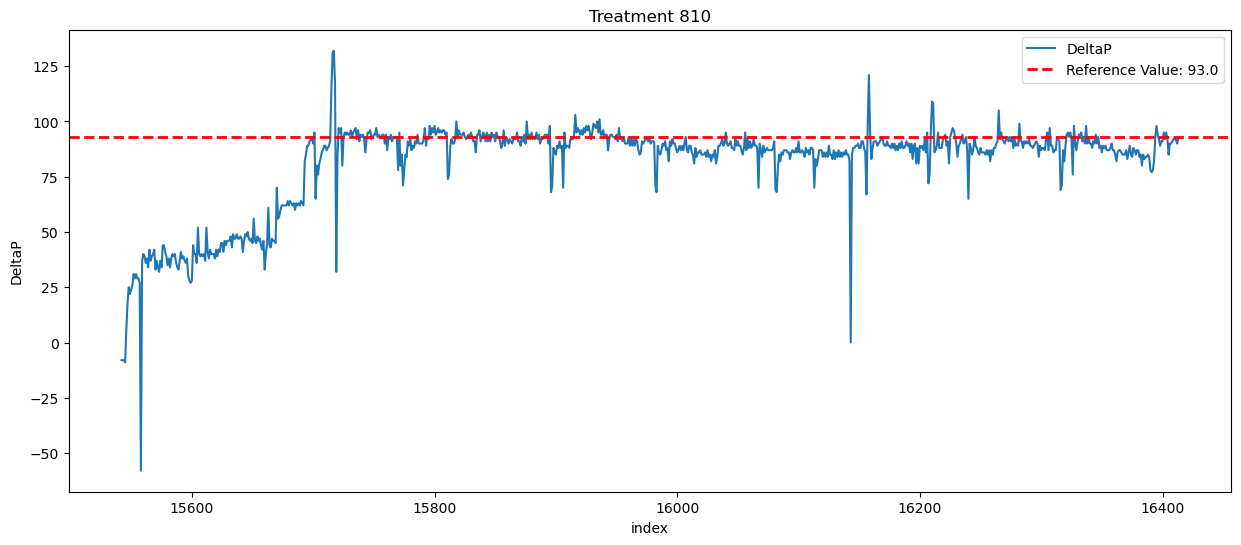

In [15]:
ref_final = reference + 100
fig, ax = plt.subplots(figsize=(15, 6))
df_test["DeltaP"].plot(xlabel="index", ylabel="DeltaP", title=f"Treatment {trt_number}", ax=ax);
ax.axhline(y=ref_final, color='red', linestyle='--', linewidth=2, label=f'Reference Value: {ref_final}')
ax.legend()
plt.show()